In [37]:
# IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import sklearn.metrics as skm

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
import operator as op

from sklearn.impute import SimpleImputer

In [24]:
# LEEMOS LOS DATOS

data_path = 'C:/Users/jjalf/Desktop/household_power_consumption.txt'

data = pd.read_csv(data_path, sep=';',
                   parse_dates={'data': ['Date', 'Time']},
                   infer_datetime_format=True,
                   na_values=['nan', '?'],
                   index_col='data')


In [25]:
data_head = data.head()
data_head

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
data,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [26]:
data_tail = data.tail()
data_tail

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
data,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [27]:
# DESCRIBIMIOS LOS DATOS
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [28]:
# MIRAMOS LA INFORMACIÓN GENERAL DE LOS DATOS
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [29]:
# MIRAMOS LA CANTIDAD DE NAN
data.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [30]:
# BORRAMOS LOS NAN
data_clear = data.dropna()

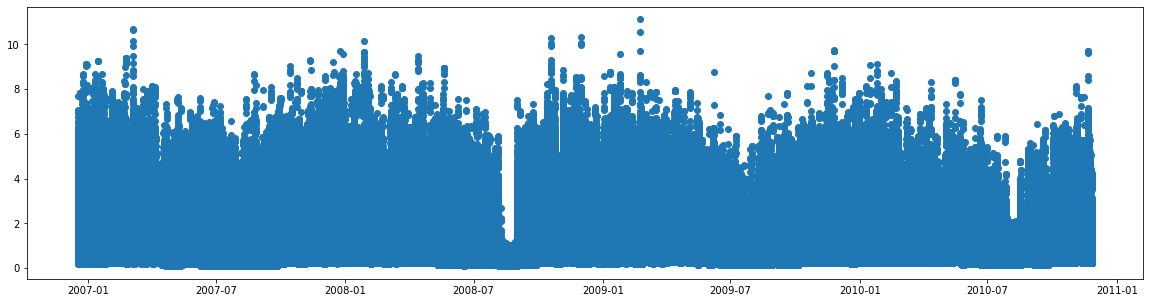

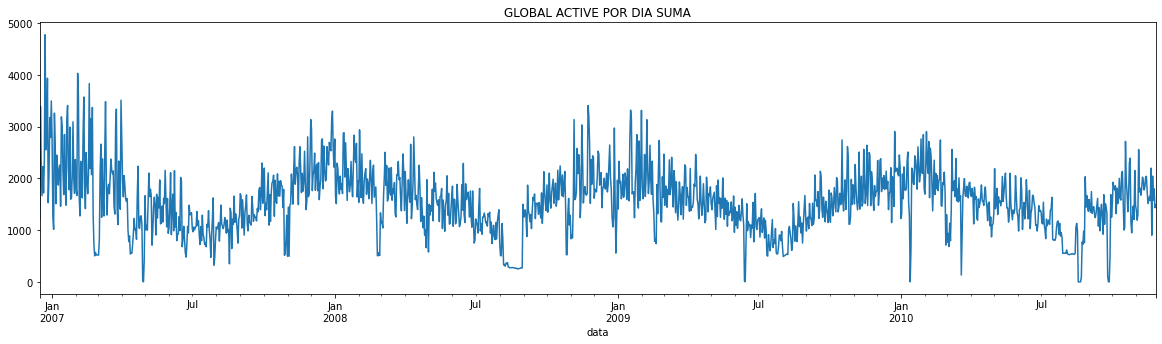

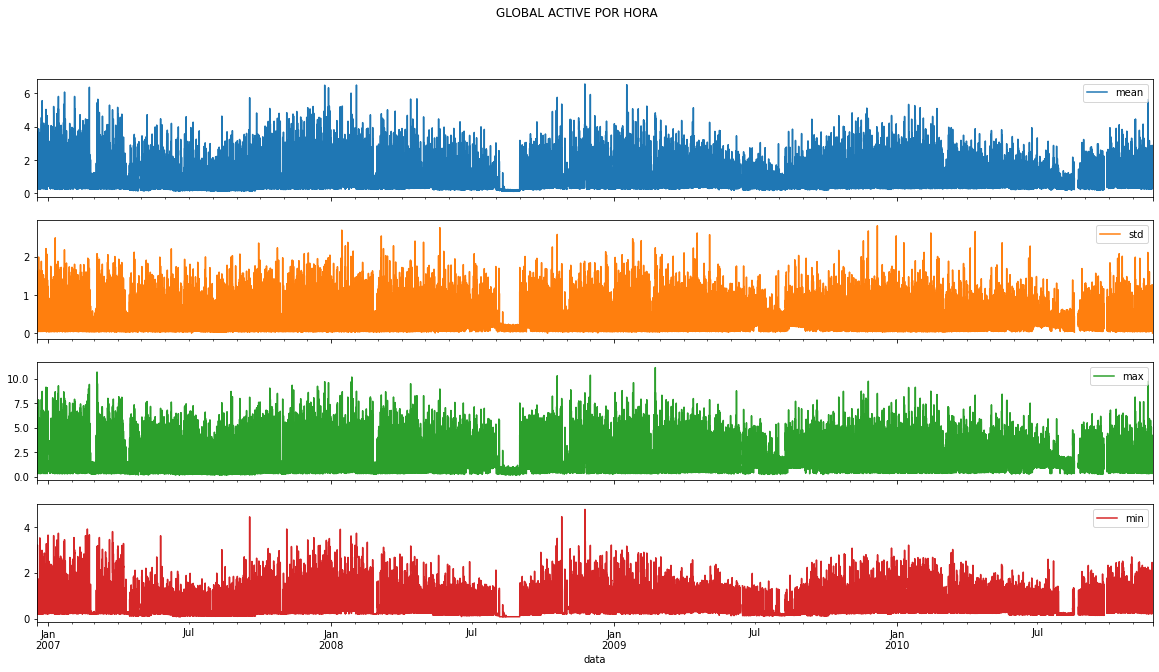

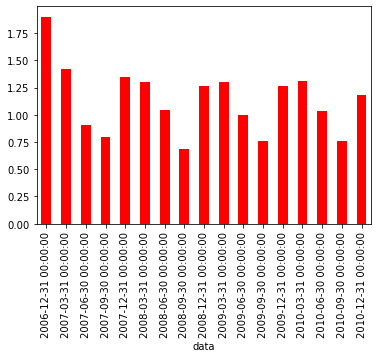

In [31]:
# VISUALISACION

# Scatter plot of Global_active_power
plt.figure(figsize=(20, 5))
plt.scatter(data_clear.index, data_clear['Global_active_power'])
plt.show()

# GLOBAL ACTIVE POR DIA SUMA
plt.figure(figsize=(20, 5))
data_clear.Global_active_power.resample('D').sum().plot(title='GLOBAL ACTIVE POR DIA SUMA')
plt.show()

# GLOBAL ACTIVE POR HORA
h = data_clear.Global_active_power.resample('h').agg(['mean', 'std', 'max', 'min'])
h.plot(subplots=True, figsize=(20, 10), title='GLOBAL ACTIVE POR HORA')
plt.show()

# GLOBAL ACTIVE POR CUARTOS
q = data_clear['Global_active_power'].resample('Q').mean().plot(kind='bar',color='red')
q.plot(subplots=True, figsize=(20, 10), title='GLOBAL ACTIVE POR CUARTOS')
plt.show()

Podemos notar que esta cantidad de datos describe una serie de tiempo, las cuales se caraterizan por contener un valor en un fecha determinada, donde los graficamos los datos por dia, hora y cuartos, lo cual nos permite un análisis más detallado por fecha. lo podemos cambiar por suma, media, mediana como se visualiza en la tercera gráfica o ver por barras como en la cuarta

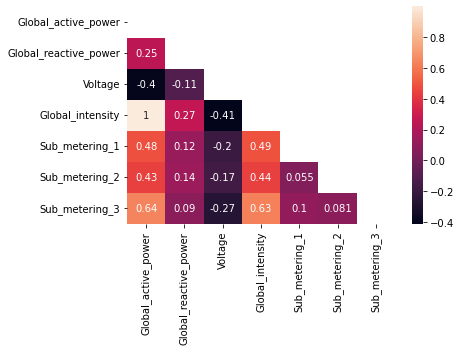

In [32]:
# Matrix de correlación
corr = np.corrcoef(data_clear.corr())
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data_clear.corr(), annot=True, mask=mask)
plt.show()

Lo siguiente que vemos es la matriz de correlación la cual nos indica que tan correlacionados esta los datos, es un indicio cuando queremos crear
un modelo con variables seleccionadas

In [39]:
class linmodel():
    def __init__(self, df, target):
        self.df = df
        self.target = target

    def pre_processing(self):
        X=self.df.drop("Global_active_power", axis=1)
        X = X.reset_index(drop=True)
        

        Y = self.df["Global_active_power"].reset_index(drop=True)
    
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(X, Y, 
                                                            test_size = 0.2, 
                                                            random_state = 2)
        return self

    def fit_pred_acc(self):
        reg = LinearRegression()
        reg.fit(self.X_train, self.Y_train)
        pred = reg.predict(self.X_test)
        mae = round(skm.mean_absolute_error(self.Y_test, pred), 2)
        rmse = round(skm.mean_squared_error(self.Y_test, pred, squared=False), 2)
        r2_score = round(skm.r2_score(self.Y_test, pred), 4)
        ev = round(skm.explained_variance_score(self.Y_test, pred), 4)
    
        return [mae, rmse, r2_score, ev]
    
lin = linmodel(data_clear, 'Global_active_power')
lin = lin.pre_processing()
lin.fit_pred_acc()

[0.03, 0.04, 0.9985, 0.9985]